# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
!pip install tensorflow
!pip install keras
!pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import os
import numpy as np

from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import random

**Let us check the version of tensorflow.**

In [ ]:
tf.__version__

'2.18.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
SVHN_data = h5py.File('/content/drive/MyDrive/Data Science/Elective Project/SVHN_single_grey1.h5', 'r')
SVHN_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Check the number of images in the training and the testing dataset.

In [ ]:
X_train = np.array(SVHN_data['X_train'])
X_test = np.array(SVHN_data['X_test'])
y_train = np.array(SVHN_data['y_train'])
y_test = np.array(SVHN_data['y_test'])

In [ ]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (42000, 32, 32)
X_test: (18000, 32, 32)
y_train: (42000,)
y_test: (18000,)


**Observation:**
- The dataset comprises six distinct keys: X_train, X_test, X_val, y_train, y_test, and y_val, where the X entries represent image data and the y entries correspond to their respective labels. In this case, only train and test data sets are used for constructing models.

- From a total of 60,000 images, the training and test datasets are partitioned in a 70:30 ratio (42000 and 18000).

- Based on the observed data shape, it can be inferred that the dataset consists of one-dimensional data without any channel dimension.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

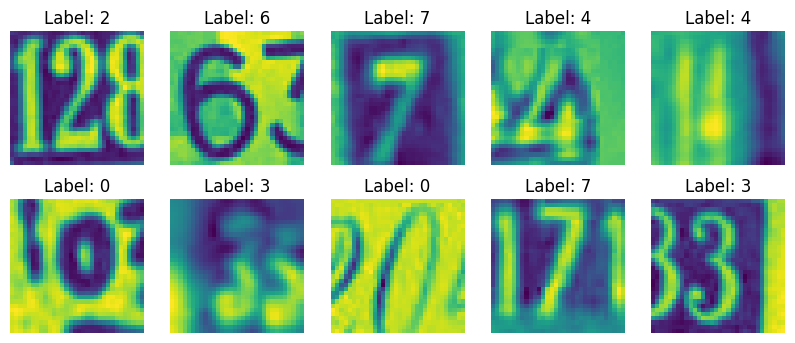

In [ ]:
fig = plt.figure(figsize=(10, 4))

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

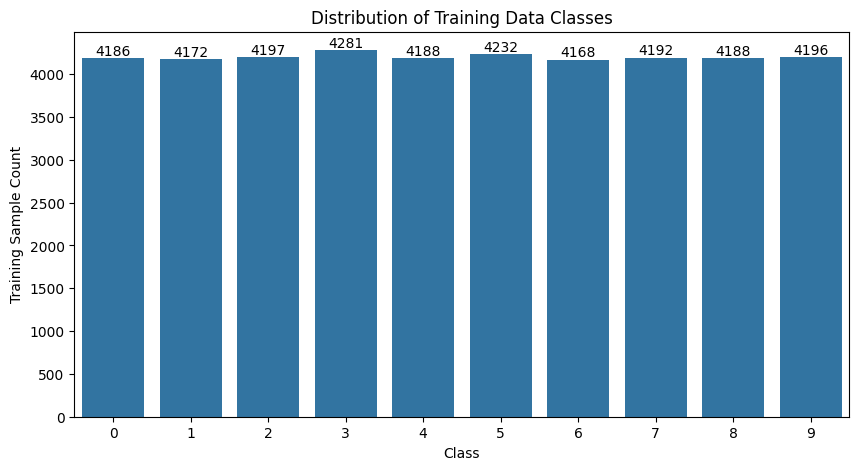

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
distr = sns.barplot(x=unique, y=counts)
plt.xlabel("Class")
plt.ylabel("Training Sample Count")
plt.title("Distribution of Training Data Classes")
distr.bar_label(distr.containers[0])
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print('X_train_Shape: ', X_train[0].shape)
print(X_train[0])

X_train_Shape:  (32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Print the shapes of Training and Test data

In [ ]:
print('X_train shape: {}, X_test shape: {}'.format(X_train.shape, X_test.shape))
print('X_train:', X_train[0])
print('X_test:', X_test[0])

X_train shape: (42000, 32, 32), X_test shape: (18000, 32, 32)
X_train: [[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
 [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
 [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
 ...
 [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
 [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
 [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]
X_test: [[0.15905097 0.18349686 0.19206432 ... 0.43966785 0.44309962 0.43986115]
 [0.15465844 0.17369059 0.18500705 ... 0.43534195 0.43508825 0.4311247 ]
 [0.1507796  0.1711349  0.19101882 ... 0.4309494  0.43114275 0.42786196]
 ...
 [0.13720353 0.13910078 0.15555921 ... 0.42827842 0.4310094  0.44209644]
 [0.13984391 0.13939686 0.15811491 ... 0.43529335 0.43940786 0.4484043 ]
 [0.1419102  0.13890745 0.15960705 ... 0.43143883 0.4360851  0.44780627]]


### **One-hot encode output**

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test = keras.utils.to_categorical(y_test, num_classes=len(np.unique(y_test)))

In [ ]:
print(y_train.shape)
print(y_train)

(42000, 10)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Observation:**
- The categories of y-values are vectorized to the 10 dimensions.
- Each vector is a 10-dimensional column vector containing 0s and 1s, where the element corresponding to the class label is 1, and all other elements are 0.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
backend.clear_session()

In [ ]:
def nn_model_1():
    model = Sequential()

    model.add(Flatten(input_shape=(32, 32, 1)))
    model.add(Dense(units=64, activation='relu', input_shape=(1024,)))

    model.add(Dense(units=32, activation='relu'))

    model.add(Dense(units=10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

In [ ]:
nn_model_1 = nn_model_1()
nn_model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn_history_1 = nn_model_1.fit(X_train,  y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1073 - loss: 2.3092 - val_accuracy: 0.1632 - val_loss: 2.2677
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1778 - loss: 2.2184 - val_accuracy: 0.2912 - val_loss: 2.0361
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3392 - loss: 1.9184 - val_accuracy: 0.4385 - val_loss: 1.6545
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4624 - loss: 1.6101 - val_accuracy: 0.5181 - val_loss: 1.4750
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5249 - loss: 1.4636 - val_accuracy: 0.5407 - val_loss: 1.4091
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5543 - loss: 1.3851 - val_accuracy: 0.5619 - val_loss: 1.3614
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5760 - loss: 1.3307 - val_accuracy: 0.5850 - val_loss: 1.3071
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5938 - loss: 1.2858 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

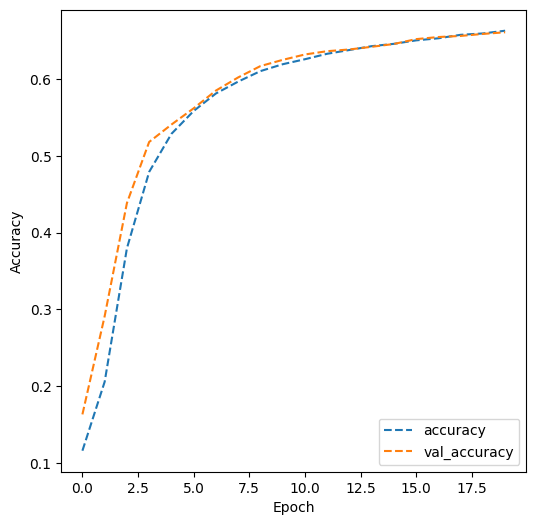

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(nn_history_1.history['accuracy'], '--', label='accuracy')
plt.plot(nn_history_1.history['val_accuracy'], '--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = nn_model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6664


**Observations:**
- The first ANN model consists of two hidden layers.
- The total number of trainable parameters is 68,010.
-   Both accuracies exhibit a similar pattern, suggesting that the model is being trained effectively without signs of overfitting. The accuracies increase sharply during the first five epochs, followed by a gradual rise to approximately 68%.
-   The final test accuracy is approximately 67%.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
backend.clear_session()

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():
    model = Sequential()

    model.add(Flatten(input_shape=(32, 32, 1)))
    model.add(Dense(units=256, activation='relu', input_shape=(1024,)))

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=64, activation='relu'))

    model.add(Dense(units=64, activation='relu'))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(units=10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
    return model

In [ ]:
nn_model_2 = nn_model_2()
nn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
nn_history_2 = nn_model_2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1010 - loss: 2.3885 - val_accuracy: 0.1102 - val_loss: 2.3028
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1120 - loss: 2.2998 - val_accuracy: 0.1350 - val_loss: 2.2916
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2180 - loss: 2.0823 - val_accuracy: 0.3696 - val_loss: 1.8661
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4199 - loss: 1.6878 - val_accuracy: 0.5662 - val_loss: 1.4198
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5374 - loss: 1.4117 - val_accuracy: 0.6312 - val_loss: 1.1811
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6013 - loss: 1.2410 - val_accuracy: 0.6196 - val_loss: 1.1839
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6375 - loss: 1.1392 - val_accuracy: 0.6074 - val_loss: 1.1954
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6540 - loss: 1.0862 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

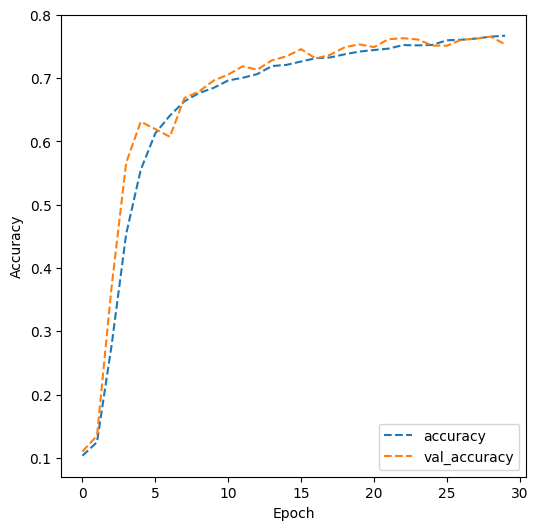

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(nn_history_2.history['accuracy'], '--', label='accuracy')
plt.plot(nn_history_2.history['val_accuracy'], '--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = nn_model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7508


**Observations:**
- The second ANN model consists of seven hidden layers, including five dense layers, one dropout layer, and one batch normalization layer.
- The total number of trainable parameters is 310,186.
- The current model achieved an aproximate accuracy of 76%, which is higher than that of the first model.
- The fact that the validation accuracy keeps closely following the training accuracy without any significant overfitting indicates that the model is generalizing well.
- The test accuracy is approximately 75%.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
y_pred_probs = nn_model_2.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1814
           1       0.76      0.79      0.77      1828
           2       0.70      0.80      0.75      1803
           3       0.60      0.78      0.68      1719
           4       0.86      0.79      0.83      1812
           5       0.67      0.75      0.70      1768
           6       0.83      0.71      0.76      1832
           7       0.83      0.74      0.79      1808
           8       0.70      0.73      0.71      1812
           9       0.84      0.67      0.75      1804

    accuracy                           0.75     18000
   macro avg       0.76      0.75      0.75     18000
weighted avg       0.76      0.75      0.75     18000



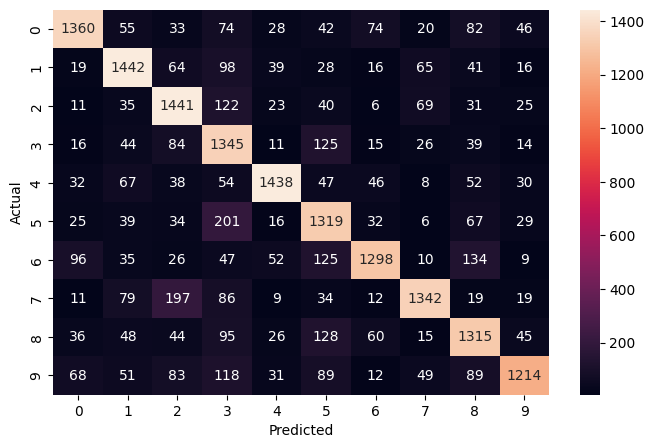

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
class_names = range(0, 10)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='.0f',xticklabels = class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**
- The X-axis represents the predicted labels, while the Y-axis shows the actual labels.
- The fact that most values lie along the diagonal suggests that the model performs well in classifying the digits, achieving an accuracy of 75%.
- The F1-scores for digits 3, 5, and 8 are significantly lower compared to other classes. Notable misclassifications include digit 5 being frequently predicted as 3, and vice versa.
- Misclassifications between digits often vary when the model is newly trained. e.g. at this time:
 - Digit 7 is often misclassified as 2.
 - Digit 3 is often misclassified as 5, and vice versa.
- The reason is that the initial weights are randomly initialized, so the training path may differ each time, which can lead to varying results and make it difficult to find the optimal solution.



## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
SVHN_data = h5py.File('/content/drive/MyDrive/Data Science/Elective Project/SVHN_single_grey1.h5', 'r')
SVHN_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Check the number of images in the training and the testing dataset.

In [ ]:
X_train = np.array(SVHN_data['X_train'])
X_test = np.array(SVHN_data['X_test'])
y_train = np.array(SVHN_data['y_train'])
y_test = np.array(SVHN_data['y_test'])

In [ ]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (42000, 32, 32)
X_test: (18000, 32, 32)
y_train: (42000,)
y_test: (18000,)


**Observation:**

- The training and test datasets are the same as those used for the ANN models.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print('X_train_Shape:', X_train[0].shape)
print(X_train[0])

X_train_Shape: (32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train/255
X_test = X_test/255

Print New shape of Training and Test

In [ ]:
print('X_train shape: {}, X_test shape: {}'.format(X_train.shape, X_test.shape))
print('X_train:', X_train[0])
print('X_test:', X_test[0])

X_train shape: (42000, 32, 32, 1), X_test shape: (18000, 32, 32, 1)
X_train: [[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]
X_test: [[[0.15905097]
  [0.18349686]
  [0.19206432]
  ...
  [0.43966785]
  [0.44309962]
  [0.43986115]]

 [[0.15465844]
  [0.17369059]
  [0.18500705]
  ...
  [0.43534195]
  [0.43508825]
  [0.4311247 ]]

 [[0.1507796 ]
  [0.1711349 ]
  [0.19101882]
  ...
  [0.4309494 ]
  [0.43114275]
  [0.42786196]]

 ...

 [[0.13720353]
  [0.1

### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test = keras.utils.to_categorical(y_test, num_classes=len(np.unique(y_test)))

In [ ]:
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Observation:**
- To use the dataset for a CNN model, it must be reshaped by adding a channel dimension. In this case, the channel value is set to 1, since the images are in grayscale.
- The categorial y-datasets are also vectorized in the same way as for the ANN models.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1)))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(LeakyReLU(0.1))
    model.add(Dense(units = 10, activation  = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

    return model

In [ ]:
cnn_model_1 = cnn_model_1()
cnn_model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_history_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3729 - loss: 1.7480 - val_accuracy: 0.7952 - val_loss: 0.6990
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8239 - loss: 0.5995 - val_accuracy: 0.8264 - val_loss: 0.6051
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8581 - loss: 0.4948 - val_accuracy: 0.8395 - val_loss: 0.5677
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8749 - loss: 0.4341 - val_accuracy: 0.8505 - val_loss: 0.5401
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8852 - loss: 0.3944 - val_accuracy: 0.8539 - val_loss: 0.5323
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8958 - loss: 0.3586 - val_accuracy: 0.8564 - val_loss: 0.5249
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9058 - loss: 0.3280 - val_accuracy: 0.8625 - val_loss: 0.5203
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9134 - loss: 0.2988 - 

### **Plot the Training and Validation Accuracies and Write your observations.**

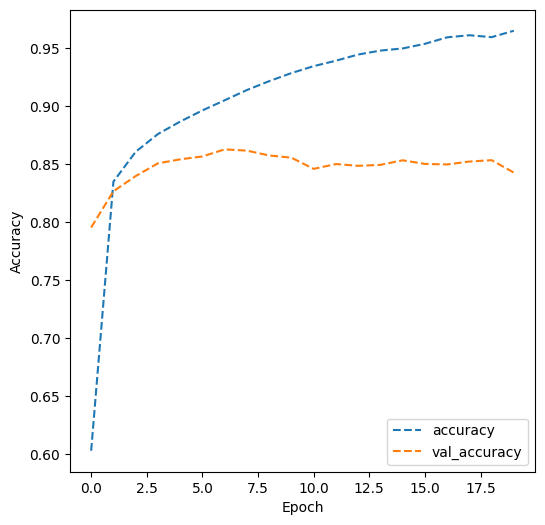

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(cnn_history_1.history['accuracy'], '--', label='accuracy')
plt.plot(cnn_history_1.history['val_accuracy'], '--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = cnn_model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8497


**Observations:**
- The first CNN model consists of seven hidden layers, including two convolutional layers, one dense layer, three LeakyReLU activations, and one max-pooling layer.
- The total number of trainable parameters is 267,306.
- The training accuracy continues to improve, while the validation accuracy peaks early and gradually declines. This indicates that the model is overfitting the training data and failing to generalize well to unseen data.
- In the next step, it is important to reduce overfitting to improve generalization.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1)))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(units = 10, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

    return model

In [ ]:
cnn_model_2 = cnn_model_2()
cnn_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
cnn_history_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1027 - loss: 2.3422 - val_accuracy: 0.1126 - val_loss: 2.5429
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1983 - loss: 2.1023 - val_accuracy: 0.7286 - val_loss: 0.9034
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6573 - loss: 1.0276 - val_accuracy: 0.8446 - val_loss: 0.5516
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7532 - loss: 0.7452 - val_accuracy: 0.8748 - val_loss: 0.4381
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7901 - loss: 0.6288 - val_accuracy: 0.8499 - val_loss: 0.5169
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8121 - loss: 0.5654 - val_accuracy: 0.8855 - val_loss: 0.4027
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8296 - loss: 0.5224 - val_accuracy: 0.8954 - val_loss: 0.3744
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8384 - loss: 0.4887 - val_accuracy: 0

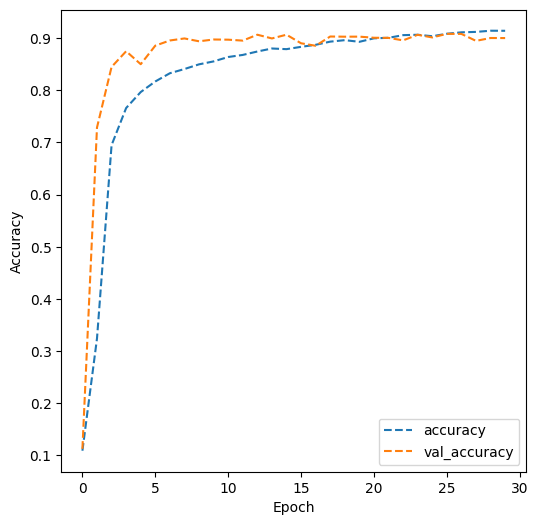

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(cnn_history_2.history['accuracy'], '--', label='accuracy')
plt.plot(cnn_history_2.history['val_accuracy'], '--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9038


**Observations:**
- The first CNN model consists of 15 hidden layers, including four convolutional layers, one dense layer, five LeakyReLU activations, two max-pooling layers, two batch normalization layers, and one dropout layer.
- The total number of trainable parameters is 164,170.
- Training and validation accuracy rise quickly during the first 5 epochs, then continue to improve more gradually and eventually converge around 90%, indicating stable learning and no significant overfitting.
- The test accuracy is also approximately 90%, similar to the training accuracy.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model**

In [ ]:
y_pred_probs = cnn_model_2.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1814
           1       0.92      0.88      0.90      1828
           2       0.90      0.93      0.92      1803
           3       0.90      0.86      0.88      1719
           4       0.90      0.92      0.91      1812
           5       0.88      0.92      0.90      1768
           6       0.88      0.90      0.89      1832
           7       0.93      0.92      0.93      1808
           8       0.90      0.88      0.89      1812
           9       0.91      0.89      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



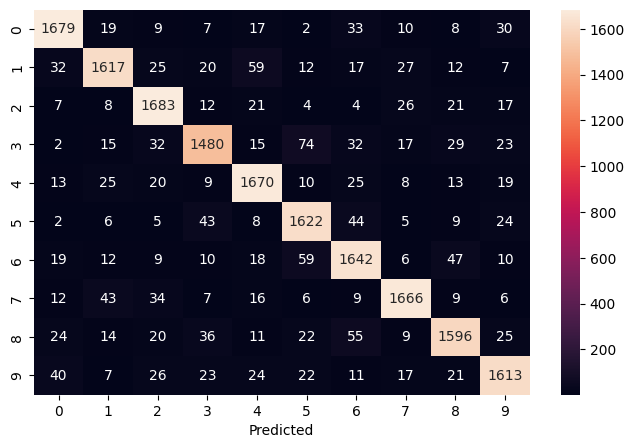

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
class_names = range(0, 10)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='.0f',xticklabels = class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.show()

**Observation:**
* The CNN model performs extraordinary with 90% average accuracy.
* No particular digit shows a significant classification error.
* It was also observed that some misclassifications vary with each training, but the differences are not significant.


### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**
- The test dataset exhibits a relatively uniform distribution across all digit classes, allowing for a fair and meaningful evaluation of the model's performance.
- The second ANN model shows better classification performance with 75% accuracy than the first ANN model with 65%.
- Despite the high accuracy of the second CNN model, it appears to be overfitted, indicating that it may not have been trained effectively.
- The second CNN model achieves a high accuracy of 90% and demonstrates no significant overfitting, which means the model generalizes well to unseen data.
- Improvement in model performance can be commonly expected through data augmentation, increased complexity, or transfer learning. In this case, However, the data augmentation didn't lead to better performance due to the following reasons:
 - The images in the data sets are relatively so small, that they should not be modified significantly, e.g. only a small angle rotation under 10°. However, such augmentations including shifting and flipping etc. also didn't improve performance in this case.
 - Several images in the training set show digits that are not clearly recognizable due to blurred or poorly defined contours and shapes.
 - Some images contain additional digits alongside the labeled one, which may confuse the model.
- Therefore, it can also be recommended that sufficient data preprocessing is conducted in the earlier stages before building models to improve the data quality.

###**Visualizing the Model’s Classification Results**

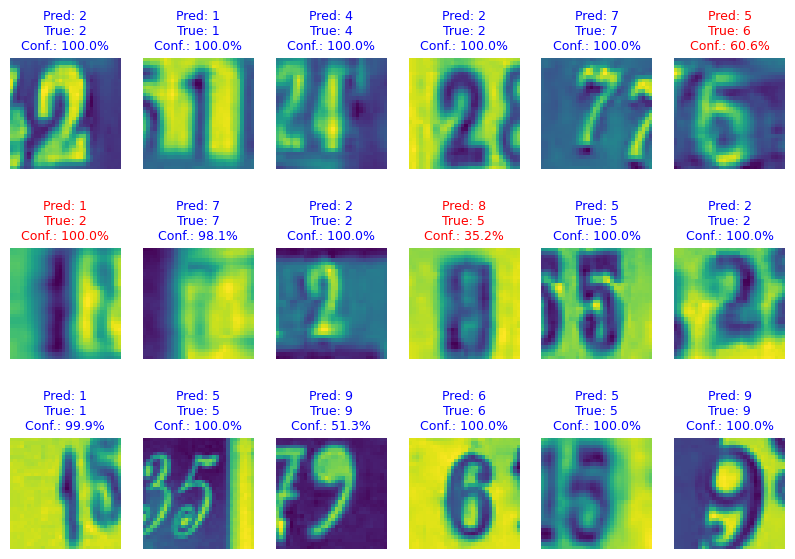

In [ ]:
fig = plt.figure(figsize=(10, 7))
cols = 6
rows = 3

for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_pred))
        ax2 = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax2.imshow(X_test[random_index])
        pred_label = y_pred[random_index]
        test_label = y_test[random_index]
        confidence = y_pred_probs[random_index][pred_label]
        if y_pred[random_index] == y_test[random_index]:
            color = 'blue'
        else:
            color = 'red'
        ax2.set_title(f"Pred: {y_pred[random_index]}\nTrue: {y_test[random_index]}\nConf.: {confidence*100:.1f}%", fontsize=9, color=color)
        ax2.axis('off')